In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
from plotly import tools

In [3]:
plt.style.use('ggplot')


#### This dataset contains the life expectancy of West African countries from 1960 to 2013. It was obtained from World Bank's databank.

In [5]:
data = pd.read_csv('west_africa_le.csv')

#### This is the schema and how th etop 5 rows look like

In [6]:
data.head()

,Unnamed: 0,BEN,BFA,CMR,CIV,GAB,GHA,GIN,GNB,LBR,MLI,MRT,NGA,NER,STP,SLE,CPV,GMB,TGO
0,YR1960,37.278268,34.477902,41.523756,36.872415,39.570122,45.831463,34.886390,37.840439,34.783171,28.211610,43.483098,37.182951,35.515049,50.451366,30.331537,48.856415,32.042220,40.272829
1,YR1961,37.731195,34.938634,41.965341,37.563073,39.928049,46.266707,35.081122,38.143293,35.046268,28.358732,44.163927,37.638268,35.594268,51.031098,30.540439,49.045976,32.325634,40.916488
2,YR1962,38.189415,35.405878,42.405951,38.233829,40.374000,46.682537,35.260390,38.467220,35.354122,28.548463,44.825220,38.079073,35.665463,51.597293,30.752780,49.316512,32.661098,41.555098
3,YR1963,38.657341,35.879659,42.843561,38.880171,40.924951,47.078439,35.425171,38.813707,35.715220,28.796390,45.460024,38.499854,35.729634,52.146000,30.977561,49.680512,33.062098,42.189171
4,YR1964,39.136854,36.358951,43.278659,39.505098,41.585415,47.453366,35.580927,39.181268,36.130000,29.111049,46.062341,38.899122,35.787805,52.674756,31.230390,50.139000,33.537634,42.819220


In [7]:
#change first column header to "years"
data.rename(columns={'Unnamed: 0': 'years'}, inplace=True)

#### Basic line plot of the data against the years to see if anything stands out

In [43]:
data.iplot(kind='scatter', x='years', dimensions=(1000,750), yTitle='Age in Years')

#### Looks like in Life expectancy in West Africa countries has increased since 1960. Although, there are some downward slopes and flat lines in the middle for some countries. Sierra Leone is the outlier in red that you can easily spot. We will explore that after we find out the range of years that each country experienced the largest growth.

In [11]:
# this function takes in a duration of years and outputs the top 3 spans of years that each country had the highest growth rate
def largest_growth_rate (data, country, period):
    year = []
    g_rate = 0.00
    for i in range(len(country)-period):
        rate = ((country[i+period] - country[i])/country[i]) * 100
        if rate <= g_rate:
            pass
        else:
            year.append((rate,(data.years[i], data.years[i+period])))
    return sorted(year, reverse=True)[:3]
        
        
        

In [12]:
'''For example, the top 3 span of 5 years that Sierra Leone experienced the highest growth rate is:'''
largest_growth_rate(data,data.SLE, 5)

[(12.764704421539566, ('YR1999', 'YR2004')),
 (12.698134524553994, ('YR2000', 'YR2005')),
 (12.422979754684846, ('YR1998', 'YR2003'))]

In [13]:
# Highest life expectancy growth rates over a period of 10 years per country
for i in range(1,len(data.columns)):
    country = data.columns[i]
    rate1,rate2,rate3 = largest_growth_rate(data,data[data.columns[i]], 10)
    
    print ('{0} has {1:0.2f}% {2} - {3}'.format(country, rate1[0], rate1[1][0], rate1[1][1]))
    

BEN has 13.91% YR1963 - YR1973
BFA has 19.62% YR1973 - YR1983
CMR has 11.60% YR1967 - YR1977
CIV has 19.00% YR1964 - YR1974
GAB has 20.14% YR1964 - YR1974
GHA has 8.71% YR1981 - YR1991
GIN has 21.04% YR1979 - YR1989
GNB has 9.92% YR1963 - YR1973
LBR has 17.55% YR1968 - YR1978
MLI has 22.53% YR1968 - YR1978
MRT has 12.93% YR1960 - YR1970
NGA has 10.81% YR1968 - YR1978
NER has 15.52% YR2003 - YR2013
STP has 10.81% YR1965 - YR1975
SLE has 25.32% YR1998 - YR2008
CPV has 12.62% YR1970 - YR1980
GMB has 23.96% YR1966 - YR1976
TGO has 15.55% YR1960 - YR1970


#### It is obvious from this that West Africa's best years as regards Life Expectancy growth rate were in the 60's. The 90's and 80's look sad. To verify this, the average growth rate for each decade is taken.

In [16]:
#function to get the average growth rate per decade of all countries
def decade_growth_rate (data, period):
    average_rates = []
    
    for i in range(0,len(data)-period,period):
        rate = 0
        for j in range(1,len(data.columns)):
            rate += ((data[data.columns[j]][i+period] - data[data.columns[j]][i]) / data[data.columns[j]][i])*100
        average_rates.append((data[data.columns[0]][i],rate/period))
    return average_rates
        

In [17]:
decades = decade_growth_rate(data,10)

In [18]:
decades

[('YR1960', 21.921631958604827),
 ('YR1970', 24.451777403478903),
 ('YR1980', 13.944846638627936),
 ('YR1990', 4.5893288952699267),
 ('YR2000', 15.940452647609661)]

In [19]:
year_dec = []
decade_rates = []
for i in decades:
    x,y = i
    year_dec.append(x)
    decade_rates.append(y)


#### Let's make a bar chart to know see which decade had the highest average growth rate

([<matplotlib.axis.XTick at 0x41d31f0>,
 <a list of 5 Text xticklabel objects>)

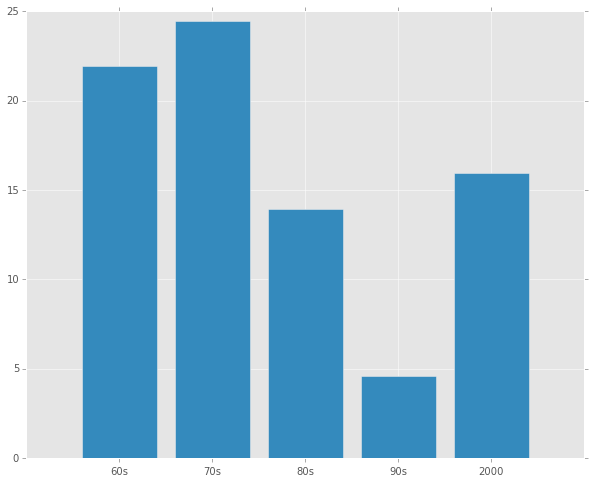

In [20]:
plt.figure (figsize=(10,8))
plt.bar(np.arange(5), decade_rates, align='center')
plt.xticks(np.arange(5),('60s', '70s', '80s', '90s', '2000'))

#### Discussion: So what really happened 80's and especially the 90's. Is it just a few countries that pulled the growth rate in life expectancy very low? First thought that came to my mind were the Civil Wars in Sierra Leone and Liberia but there were also Civil Wars in the 60s and 70s in Nigeria  and also some independence wars in Guinea Bissau.  You know, I might as well just have a plot of countries that experienced wars between 1960-2013 (Got the list from Wikipedia) to test my hypothesis that it was Civil Wars that caused the low growth rates in Life Expectancy in West Africa in the 80's and 90's

##### Countries that experienced wars betwenn 1960-2013 are G.Bissau, Nigeria, Mauritania, B.Faso, Liberia, S.Leone,Mali, I.Coast

In [21]:
data.columns

Index(['years', 'BEN', 'BFA', 'CMR', 'CIV', 'GAB', 'GHA', 'GIN', 'GNB', 'LBR',
       'MLI', 'MRT', 'NGA', 'NER', 'STP', 'SLE', 'CPV', 'GMB', 'TGO'],
      dtype='object')

In [22]:
df_war = data[['years', 'BFA', 'CIV', 'GNB', 'LBR', 'MLI', 'MRT', 'NGA', 'SLE']]

In [23]:
trace_BFA = go.Scatter(x=data['years'], y=data['BFA'])
trace_CIV = go.Scatter(x=data['years'], y=data['CIV'])
trace_GNB = go.Scatter(x=data['years'], y=data['GNB'])
trace_LBR = go.Scatter(x=data['years'], y=data['LBR'])
trace_MLI = go.Scatter(x=data['years'], y=data['MLI'])
#trace_MRT = go.Scatter(x=data['years'], y=data['MRT'])
trace_NGA = go.Scatter(x=data['years'], y=data['NGA'])
trace_SLE = go.Scatter(x=data['years'], y=data['SLE'])

In [24]:
fig = tools.make_subplots(rows=4, cols=2, subplot_titles=("Burkina Faso (1985-'1988)", "Cote d'Ivoire (2002-2007, 2010-2011)", \
                                                          "Guinea Bissau (1962-1974, 1997-1999 )", "Liberia (1989-1996, 1999-2003)",\
                                                          "Mali (1985-1988, 1990-1995)", "Nigeria (1967-1970)", "Sierra Leone (1991-2002)"))

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5 ]  [ (3,2) x6,y6 ]
[ (4,1) x7,y7 ]  [ (4,2) x8,y8 ]



In [30]:
fig['layout'].update(height=900, width=1000, title='Life Expectancy of West African Countries with Wars (1960-2013)' )
                                                  

In [31]:
fig.append_trace(trace_BFA, 1, 1)
fig.append_trace(trace_CIV, 1, 2)
fig.append_trace(trace_GNB, 2, 1)
fig.append_trace(trace_LBR, 2, 2)
fig.append_trace(trace_MLI, 3, 1)
#fig.append_trace(trace_MRT, 2, 2)
fig.append_trace(trace_NGA, 3, 2)
fig.append_trace(trace_SLE, 4, 1)


In [32]:
py.iplot(fig, filename='war_west_africa')

#### Many interesting trends are seen from the above subplots. Firstly, Sierra Leone took the deepest dives as regards life expectancy during the war period. It can be explained by the fact that they experienced the longest period of war (11 years). Even though Liberia also had 11 years of war, it was not as a stretch hence the relatively small dents in life expectancy growth rates. Guinea Bissau seems like an exception to my war hypothesis. They had a wars for 12 and 3 years respectively but their life expectancy kept on growing. The gowth rate for Guinea Bissau during the war between 1962 - 1974 might not be unusual because every country kept on growing in the 60's and 70's regardless of War (e,g. Nigeria). It is interesting to see that all the countries grew in the 60's and 70's regardless of war or not. I've got no hypothesis to pose to that though. Talking about Nigeria, despite the fact that the life expectancy rate grew during the Civil War (1967-1970) there was a lack of growth experienced from the early 80s to the late 90s. My best guess is to attribute this to the Military Regimes in power during those years. Yeah, West Africa had some really brutal leaders and I believe those regimes contributed to the lack of growth experienced in the region in the 80s and 90s.

#### This little exploration left me with more questions than answers like why that huge slump in Cote d'Ivoire a couple years before the Civil War? What makes Guinea Bissau to still experience growth even amindst over a decade of war?Why did it take Bukina Faso so many years to recover from the war. We can see that the 3 year war ended in 1988 but it was almost until the dawn of the new millenium that the growth rate picked up. Will leave that for the historians to ponder on. As for the future work, will try some clustering analysis to see what features will cluster countries that were war-torn, countries with brutal regimes and countries never experienced a set back in the life expectancy growth rate in West Africa or Africa.

In [41]:
py.plot(fig, filename='war_west_africa')

'https://plot.ly/~chux/10'